In [11]:
import bw2data as bd
import bw2calc as bc
import pbaesa
from pbaesa import utils as u

In [2]:
bd.projects.set_current('pbaesatest') # Set the current Brightway25 project where you want to apply pbaesa
bio = bd.Database("ecoinvent-3.10.1-biosphere")
ei = bd.Database("ecoinvent-3.10.1-cutoff")

In [3]:
pbaesa.create_pbaesa_methods(bio)

N-supply elementary flows already exists in biosphere!
N-supply elementary flows already exists in biosphere!
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from potassium nitrate. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from monoammonium phosphate. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from diammonium phosphate. Exchanges: 1
N-flow already added to organic nitrogen fertiliser, as N - nutrient supply from poultry manure, fresh. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from ammonium nitrate. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from potassium nitrate. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply from calcium nitrate. Exchanges: 1
N-flow already added to inorganic nitrogen fertiliser, as N - nutrient supply 

In [4]:
m = [met for met in bd.methods if "Planetary Boundaries" in str(met)]
m

[('Planetary Boundaries', 'Nitrogen Cycle'),
 ('Planetary Boundaries', 'Climate Change'),
 ('Planetary Boundaries', 'Ocean Acidification'),
 ('Planetary Boundaries', 'Change in Biosphere Integrity'),
 ('Planetary Boundaries', 'Phosphorus Cycle'),
 ('Planetary Boundaries', 'Atmospheric Aerosol Loading'),
 ('Planetary Boundaries', 'Freshwater Use'),
 ('Planetary Boundaries', 'Stratospheric Ozone Depletion'),
 ('Planetary Boundaries', 'Land-system Change')]

In [5]:
allocation_factors = pbaesa.get_all_allocation_factor("DE", "Cultivation of wheat", 2022)
allocation_factors

Allocation factors file for year 2022 not found.
Attempting to generate allocation factors...
Final Consumption Expenditure per geographical scope calculated!
Final Consumption Expenditure per sector within geographical scope calculated!
Final Consumption Expenditure per geographical scope calculated!
Final Consumption Expenditure per sector within geographical scope calculated!


,Unnamed: 0,Allocation factor calculated via total final consumption expenditure,Allocation factor calculated via direct final consumption expenditure,Allocation factor calculated via total gross value added,Allocation factor calculated via direct gross value added,Country (c.f. ISO 3166-1 alpha-2) & Rest of World regions,Sector (c.f. EU’s NACE Rev.1 classification)
1654,DE_Cultivation of wheat,0.000066,0.000026,0.000025,0.000013,DE,Cultivation of wheat


In [14]:
allocation_factor_total_FCE = allocation_factors["Allocation factor calculated via total final consumption expenditure"].iloc[0]
allocation_factor_total_GVA = allocation_factors["Allocation factor calculated via total gross value added"].iloc[0]

In [7]:
my_process = ei.get(name='wheat grain production', location='DE')

fu = 22.6 * 10e6

functional_unit = {
    "wheat production": {my_process.id: fu },
}
config = {
    "impact_categories": m,
}
data_objs = bd.get_multilca_data_objs(
    functional_units=functional_unit, method_config=config
)

mlca = bc.MultiLCA(demands=functional_unit, method_config=config, data_objs=data_objs)
mlca.lci()
mlca.lcia()
mlca_scores = mlca.scores

In [8]:
exploitations = u.calculate_exploitation_of_SOS(mlca_scores)
exploitations

{(('Planetary Boundaries', 'Nitrogen Cycle'),
  'wheat production'): 8.375034739994082e-05,
 (('Planetary Boundaries', 'Climate Change'),
  'wheat production'): 1.9588687834172194e-05,
 (('Planetary Boundaries', 'Ocean Acidification'),
  'wheat production'): 4.532930188957121e-06,
 (('Planetary Boundaries', 'Change in Biosphere Integrity'),
  'wheat production'): 2.5427623049501263e-05,
 (('Planetary Boundaries', 'Phosphorus Cycle'),
  'wheat production'): 2.0891978166970844e-06,
 (('Planetary Boundaries', 'Atmospheric Aerosol Loading'),
  'wheat production'): 3.830335011550619e-06,
 (('Planetary Boundaries', 'Freshwater Use'),
  'wheat production'): 4.826557644308421e-06,
 (('Planetary Boundaries', 'Stratospheric Ozone Depletion'),
  'wheat production'): 1.2153900569207879e-06,
 (('Planetary Boundaries', 'Land-system Change'),
  'wheat production'): 4.0275415747462e-06}

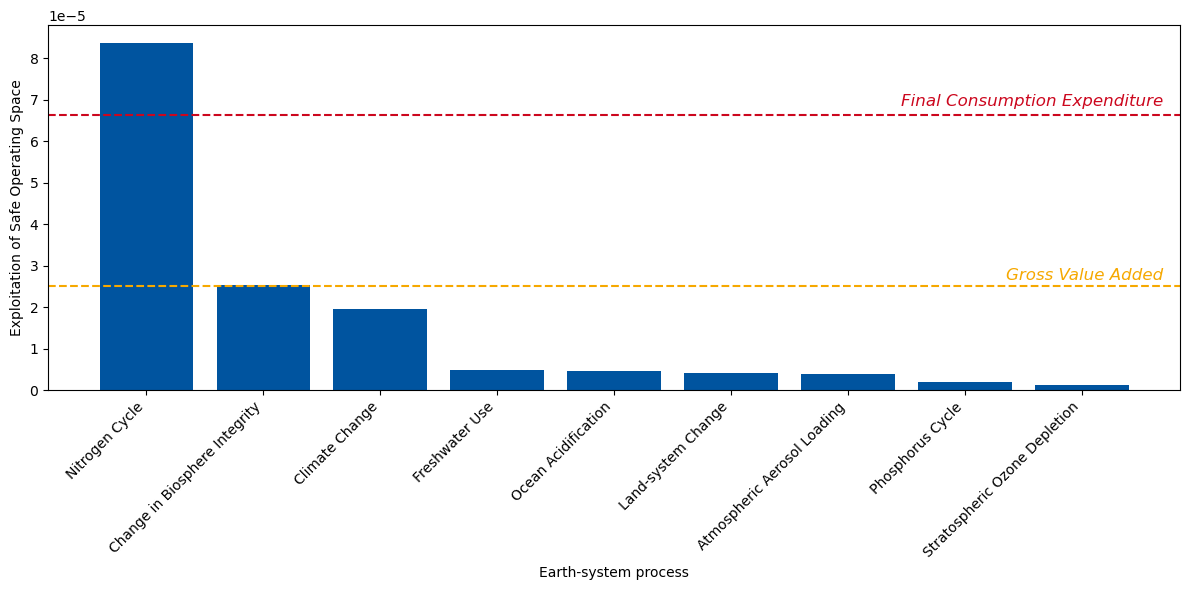

In [15]:
u.plot_AESA(exploitations, allocation_factor_total_FCE, allocation_factor_total_GVA)